## Correlacion de pearson

Explora la potencial relacion entre las viariables analizadas   
Indica la magnitud y la direccion de la relacion que puede haber entre dos variables 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ruta = r'C:\Users\USUARIO\Documents\Python Scripts\ML\Scripts\DATA_TOOLS\PANDAS\personas.csv'
ruta = ruta.replace(os.sep, '/')
data_personas =  pd.read_csv(ruta)
data_personas

,altura,peso,ingreso,horas_trabajadas,ausencias
0,134.433878,70.617864,9973.577534,40.905476,4
1,167.158746,109.268295,8961.047249,41.576483,4
2,141.480812,81.034644,7437.977263,41.369239,5
3,123.227119,57.884172,12064.915290,41.537211,3
4,143.554951,93.581093,9296.396167,40.441203,4
...,...,...,...,...,...
995,169.059462,109.612155,9998.522402,41.110352,4
996,151.873081,91.697127,6867.097603,40.617061,5
997,131.156800,78.301155,9757.539280,40.798085,4
998,156.454396,94.163603,11044.031510,41.443604,3


In [16]:
bachelors = data_personas.apply(lambda data_personas: data_personas['altura']<160, axis=1).sum()
bachelors

710

#### __Correlacion lineal entre las variables__

#### __Relacion: ALtura-Peso__

Relacion lineal, positiva

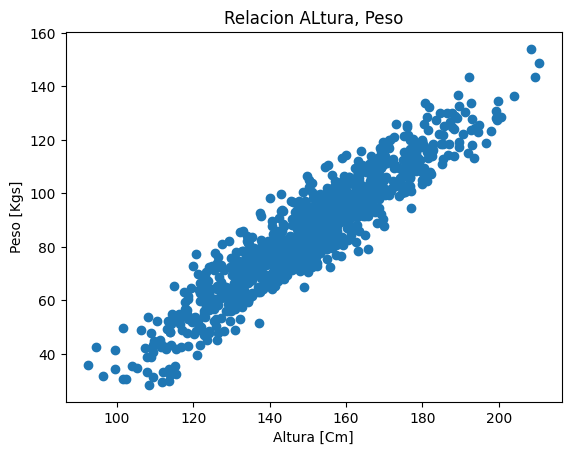

In [3]:
plt.scatter(data_personas['altura'], data_personas['peso'])
plt.xlabel('Altura [Cm]')
plt.ylabel('Peso [Kgs]')
plt.title('Relacion ALtura, Peso')
plt.show()

#### __Relacion: Ingreso y horas trabajadas__

Relacion lineal, sin embargo tiene mayor dispersion   
La correlacion no implica causalidad

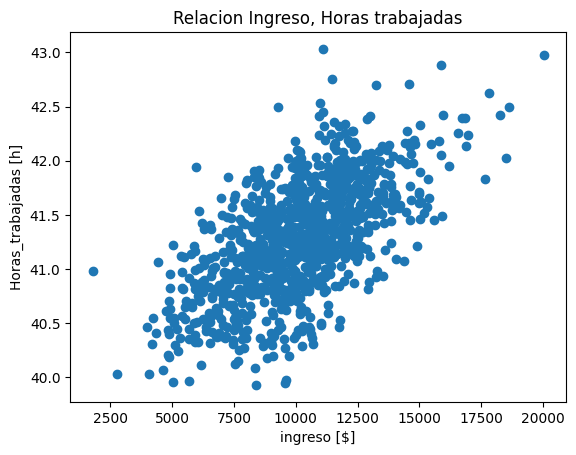

In [4]:
plt.scatter(data_personas['ingreso'], data_personas['horas_trabajadas'])
plt.xlabel('ingreso [$]')
plt.ylabel('Horas_trabajadas [h]')
plt.title('Relacion Ingreso, Horas trabajadas')
plt.show()

#### __Relacion Ingreso y Ausencias__

Bien correlacionado, direccion negativa 

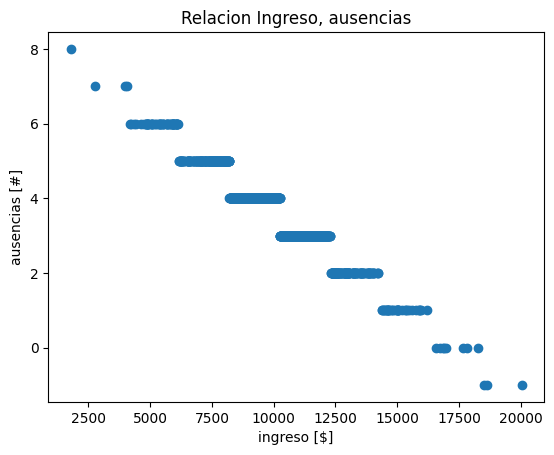

In [5]:
plt.scatter(data_personas['ingreso'], data_personas['ausencias'])
plt.xlabel('ingreso [$]')
plt.ylabel('ausencias [#]')
plt.title('Relacion Ingreso, ausencias')
plt.show()

#### __Relacion Ingreso, Peso__

No hay corralacion lineal, los datos no se ajustan a la linea

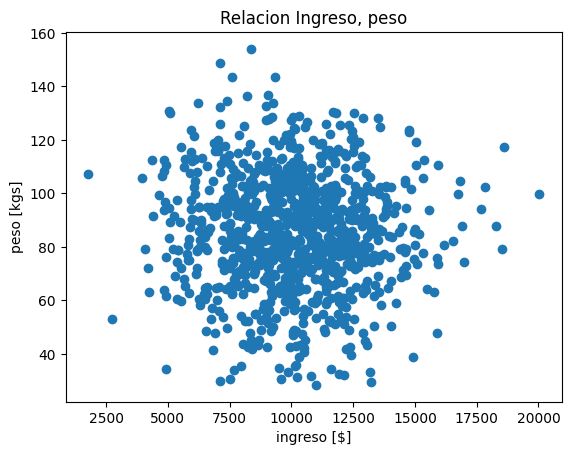

In [6]:
plt.scatter(data_personas['ingreso'], data_personas['peso'])
plt.xlabel('ingreso [$]')
plt.ylabel('peso [kgs]')
plt.title('Relacion Ingreso, peso')
plt.show()

#### __Matriz de Correlacion__
* -1: Existe relacion fuerte 
* 1: Existe relacion fuerte
* 0: poca relacion   

El signo indica la direccion de la relacion    
En la escala depende:    
* .3 a .5 baja
* .5 a .7 moderada
* .7 a 1 fuerte   
Depende los datos y la muestra 

En la matriz se puede ignorar la diagonal ya que indica una relacion 1 a 1 entre las variables    


In [7]:
data_personas.corr()

,altura,peso,ingreso,horas_trabajadas,ausencias
altura,1.000000,0.930608,-0.025283,0.008547,0.025587
peso,0.930608,1.000000,-0.029852,-0.002483,0.027450
ingreso,-0.025283,-0.029852,1.000000,0.625514,-0.973104
horas_trabajadas,0.008547,-0.002483,0.625514,1.000000,-0.603870
ausencias,0.025587,0.027450,-0.973104,-0.603870,1.000000


#### __Grafica de Correlacion__
* mapas de color: cmap='bwr': blue(-1), white(0), red(1)
* colorbar: relacion de la escala de colores
* vmin y vmax:  muestran la escala completa de -1 a 1
* ticks: para verlos ejes e incluir el nombre de las variables Para evirtar el solapamiento entre los nombres puedo rotarlos, Rotation =90 
* metodo text:  permite poner texto en la grafica. plt.text(posicion(fila, columna), valor particular round(matriz.iloc[fila, columna], decimales(int))) :: round para eliminar los decimales
* Con text tambien se puede quitar el desfase del texto y centrarlos

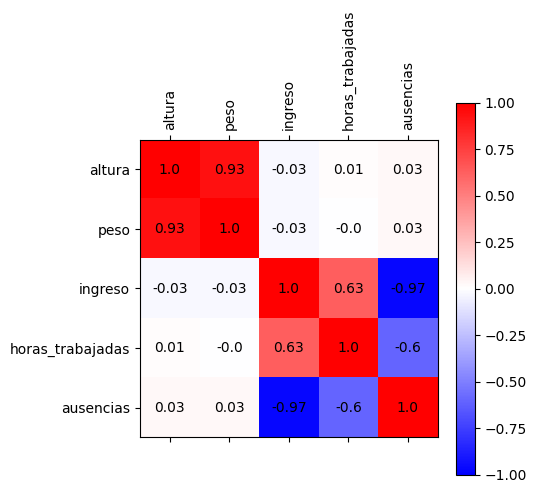

In [8]:
matriz_corr = data_personas.corr()
plt.matshow(matriz_corr, cmap = 'bwr', vmin=-1, vmax =1)
plt.xticks(range(5), data_personas.columns, rotation = 90)
plt.yticks(range(5), data_personas.columns)

## Adicionar los valores dentro de la imagen

for filas in range(len(matriz_corr.columns)):
    for columnas in range(len(matriz_corr.columns)):
        plt.text(filas, columnas, round(matriz_corr.iloc[filas, columnas], 2), ha='center', va='center') ## 

plt.colorbar()
plt.show()